# **LSTM tutorial**

## Import libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


### Random seed

In [3]:
# fix random seed for reproducibility
tf.random.set_seed(7)


## load the dataset

In [34]:
dataframe = pd.read_csv('D:\\Tuwaiq Academy\\Tuwaiq_academy_T5_Week_5\\Week5LAb2\\Datasets\\airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


LSTMs are sensitive to the scale of the input data, specifically when the sigmoid (default) or tanh activation functions are used. It can be a good practice to rescale the data to the range of 0-to-1, also called normalizing. You can easily normalize the dataset using the MinMaxScaler preprocessing class from the scikit-learn library.



## Normalize the dataset

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

## split into train and test sets

In [36]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


## convert an array of values into a dataset matrix

In [37]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]  # Indent this line
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

## function to prepare the train and test datasets for modeling.

In [45]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [46]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Fit the LSTM

In [11]:
from keras import layers

model = Sequential([
    layers.LSTM(4, input_shape=(1, look_back)),
    layers.Dense(1),
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 4)              │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101 (404.00 B)

 Trainable params: 101 (404.00 B)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0634
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0323
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0214  
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0184   
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0172  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0163   
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153  
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0143   
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0133   
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0122  
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0112   
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0101  
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091  
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0080   
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0

In [ ]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
94/94 - 2s - 20ms/step - loss: 0.0408
Epoch 2/100
94/94 - 0s - 3ms/step - loss: 0.0198
Epoch 3/100
94/94 - 0s - 3ms/step - loss: 0.0149
Epoch 4/100
94/94 - 0s - 3ms/step - loss: 0.0136
Epoch 5/100
94/94 - 0s - 2ms/step - loss: 0.0127
Epoch 6/100
94/94 - 0s - 2ms/step - loss: 0.0118
Epoch 7/100
94/94 - 0s - 3ms/step - loss: 0.0109
Epoch 8/100
94/94 - 0s - 2ms/step - loss: 0.0100
Epoch 9/100
94/94 - 0s - 3ms/step - loss: 0.0091
Epoch 10/100
94/94 - 1s - 6ms/step - loss: 0.0082
Epoch 11/100
94/94 - 0s - 2ms/step - loss: 0.0073
Epoch 12/100
94/94 - 0s - 2ms/step - loss: 0.0065
Epoch 13/100
94/94 - 0s - 2ms/step - loss: 0.0057
Epoch 14/100
94/94 - 0s - 2ms/step - loss: 0.0050
Epoch 15/100
94/94 - 0s - 2ms/step - loss: 0.0044
Epoch 16/100
94/94 - 0s - 3ms/step - loss: 0.0038
Epoch 17/100
94/94 - 0s - 2ms/step - loss: 0.0034
Epoch 18/100
94/94 - 0s - 2ms/step - loss: 0.0030
Epoch 19/100
94/94 - 0s - 2ms/step - loss: 0.0027
Epoch 20/100
94/94 - 0s - 3ms/step - loss: 0.0025
Epoch 21

## Make preductuion and evaluatuin matrix.

In [13]:
trainpred = model.predict(trainX)
testpred = model.predict(testX)

trainpred = scaler.inverse_transform(trainpred)
trainY = scaler.inverse_transform([trainY])
testpred = scaler.inverse_transform(testpred)
testY = scaler.inverse_transform([testY])

trainscore = np.sqrt(mean_squared_error(trainY[0], trainpred[:,0]))
print('train score: %0.2f RMSE' % (trainscore))

testscore = np.sqrt(mean_squared_error(testY[0], testpred[:,0]))
print('test score: %0.2f RMSE' % (testscore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
train score: 22.78 RMSE
test score: 49.98 RMSE


In [ ]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 204ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
Train Score: 22.93 RMSE
Test Score: 48.50 RMSE


# **Second run**

In [47]:
model = Sequential([
    layers.LSTM(32, input_shape=(1, look_back), return_sequences=True),
    layers.Dropout(0.2),
    layers.LSTM(64),
    layers.Dropout(0.2),
    layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

C:\Users\abo_O\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 1, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,249 (114.25 KB)

 Trainable params: 29,249 (114.25 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(trainX, trainY, epochs=100, batch_size=1,verbose=1)

Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.0429
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0133
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0108
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0061 
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0034  
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0038
Epoch 7/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0042
Epoch 8/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0036
Epoch 9/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028 
Epoch 10/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0032 
Epoch 11/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0035 
Epoch 12/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0041
Epoch 13/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0027
Epoch 14/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0030 
Epoch 15/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.00

In [49]:
trainpred = model.predict(trainX)
testpred = model.predict(testX)

trainpred = scaler.inverse_transform(trainpred)
trainY = scaler.inverse_transform([trainY])
testpred = scaler.inverse_transform(testpred)
testY = scaler.inverse_transform([testY])

trainscore = np.sqrt(mean_squared_error(trainY[0], trainpred[:,0]))
print('train score: %0.2f RMSE' % (trainscore))

testscore = np.sqrt(mean_squared_error(testY[0], testpred[:,0]))
print('test score: %0.2f RMSE' % (testscore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 175ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
train score: 22.76 RMSE
test score: 52.16 RMSE


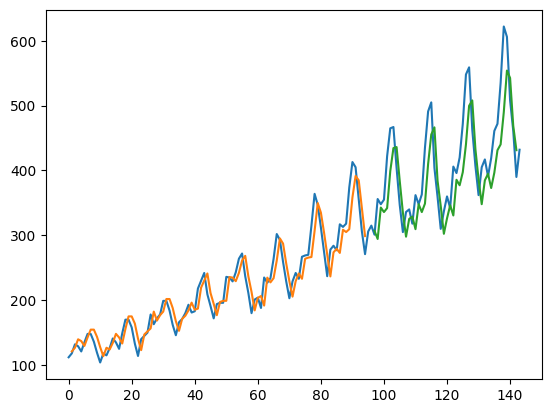

In [50]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainpred)+look_back, :] = trainpred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainpred)+(look_back*2)+1:len(dataset)-1, :] = testpred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


## Visualize the result

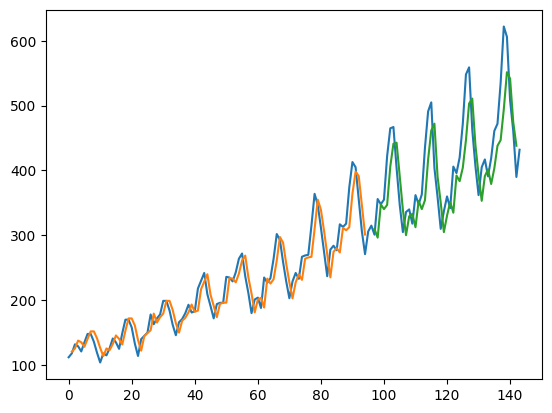

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainpred)+look_back, :] = trainpred
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainpred)+(look_back*2)+1:len(dataset)-1, :] = testpred
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


# **Well done** :)